### Support Vector Machine
<hr>

In [1]:
# Preamble: Import libraries
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn import svm

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
# Reference http://scikit-learn.org/stable/modules/svm.html

In [3]:
# Replace categoricals and boolean variables in data frame
def transform_df(df):
    df =df.drop(df.columns[0],axis=1) # drop panda indexing column
    
    #df= df.drop('Over18',axis=1)
    
    # One Hot encoding for categorical variables
    categoricals = ['BusinessTravel','Department', 'EducationField','JobRole','MaritalStatus']
    for item in categoricals:
        dummy = pd.get_dummies(df[item], prefix=item)
        df = df.join(dummy.loc[:, :])
        df = df.drop(item, axis=1)
        
    #Transform boolean values into numbers
    df['Attrition'] = df['Attrition'].map(lambda x: 0 if x == 'No' else 1)
    df['OverTime'] = df['OverTime'].map(lambda x: 0 if x == 'No' else 1)
    df['Gender'] = df['Gender'].map(lambda x: 0 if x== 'Female' else 1)
    df['Over18'] = df['Over18'].map(lambda x: 0 if x=='N' else 1)
    return df

In [40]:
# Normalize data before training the model
from sklearn.preprocessing import StandardScaler

# Create training and test sets
train_set = pd.read_csv("trainEmployeeData.csv")
test_set = pd.read_csv("testEmployeeData.csv")

# Apply transformation
train_set = transform_df(train_set)
test_set = transform_df(test_set)

y_train = train_set['Attrition']
x_train = train_set.drop(['Attrition', 'Over18'], axis=1)

scalerTrain = StandardScaler()
scalerTrain.fit(x_train)
x_train = scalerTrain.transform(x_train) #normalize

y_test = test_set['Attrition']
x_test = test_set.drop(['Attrition', 'Over18'], axis=1)

scalerTest = StandardScaler()
scalerTest.fit(x_test)
x_test = scalerTest.transform(x_test) #normalize

In [ ]:
train_set.head()

In [ ]:
x_test[0] # Normalized 

### Run grid search to determine hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = [
  {'C': [0.1, 1, 10, 100], 'gamma': [  0.1, 0.01, 0.001, 0.0001],'degree': [1,2,3], 'kernel': ['poly']},
  {'C': [0.1, 1, 10, 100], 'gamma': [ 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
]

svc = svm.SVC()
clf = GridSearchCV(svc, param_grid, verbose = 1, cv  = 5)
clf.fit(x_train, y_train)

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

In [ ]:
pd.DataFrame(clf.grid_scores_)

> Note: ('C': 1, 'kernel': 'linear') and  ('C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly')
correspond to a 0.880102 score

In [5]:
# C = 0.1, degree  = 1, gamma = 0.1, kernel = poly
svmP = svm.SVC(C = 0.1, degree = 1, gamma = 0.1,kernel = 'poly');
svmP.fit(x_train,y_train);
svmP.predict(x_test)
print ("Kernel = Poly, C = 0.1, degree = 1, gamma = 0.1")
print("Training Accuracy: ", svmP.score(x_train, y_train))
print("Test Accuracy: ", svmP.score(x_test,y_test))

Kernel = Poly, C = 0.1, degree = 1, gamma = 0.1
Training Accuracy:  0.863095238095
Test Accuracy:  0.867346938776


In [49]:
# C = 1,  kernel = Linear
svmL = svm.SVC(C = 1.0, kernel =  'linear');
svmL.fit(x_train,y_train);
svmL.predict(x_test)
print ("Kernel = Linear, C = 1")
print("Training Accuracy: ", svmL.score(x_train, y_train))
print("Test Accuracy: ", svmL.score(x_test,y_test))

Kernel = Linear, C = 1
Training Accuracy:  0.893707482993
Test Accuracy:  0.887755102041


> Linear SVC has a higher test score

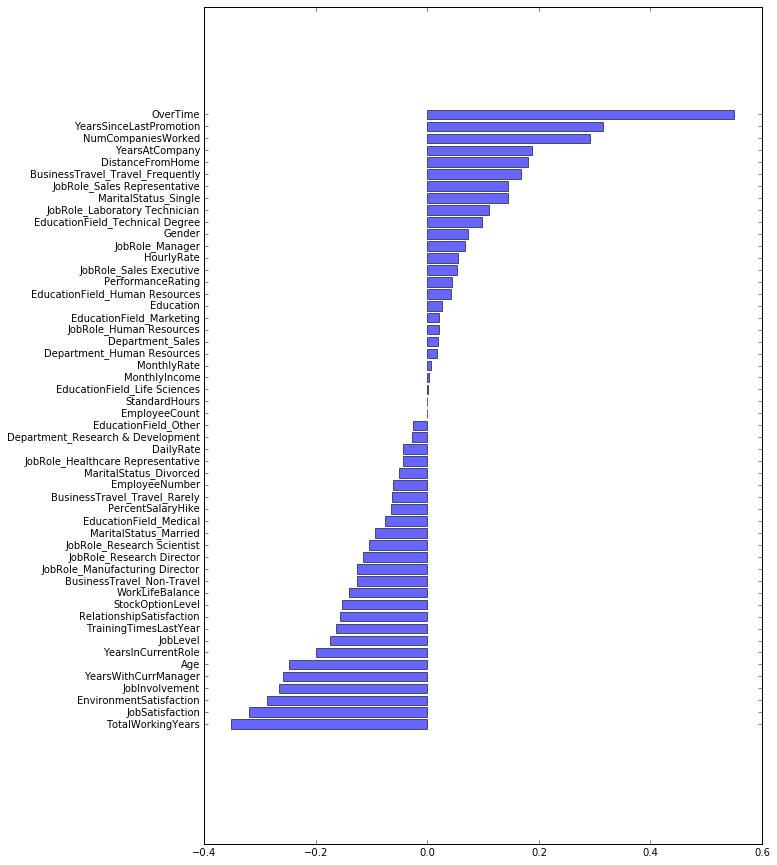

In [50]:
plt.figure(figsize = (10,15))
def f_importances(coef, names):
    imp = coef[0]
    imp,names = zip(*sorted(zip(imp,names)))
    n = len(names)
    plt.barh(range(n), imp, align='center', alpha = 0.6)
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = train_set.drop(['Attrition', 'Over18'], axis=1).columns.values
svmL = svm.SVC(C = 0.1, kernel='linear')
svmL.fit(x_train, y_train)
f_importances(svmL.coef_, features_names)

In [8]:
d = { 'feature': train_set.drop(['Attrition', 'Over18'], axis=1).columns.values, 'coeff': svmL.coef_[0]}
svc_df = pd.DataFrame(data=d)

In [9]:
svc_df = svc_df.sort_values('coeff')
n = len(svc_df);
svc_df = svc_df.set_index(np.arange(0,n))
svc_df

,coeff,feature
0,-0.351526,TotalWorkingYears
1,-0.319703,JobSatisfaction
2,-0.286812,EnvironmentSatisfaction
3,-0.265566,JobInvolvement
4,-0.257854,YearsWithCurrManager
5,-0.248359,Age
6,-0.199992,YearsInCurrentRole
7,-0.175154,JobLevel
8,-0.164230,TrainingTimesLastYear
9,-0.156606,RelationshipSatisfaction


<hr>

#### Top 5 Most Negatively Correlated Features

In [10]:
for i in range(0,5):
    print(svc_df.iloc[i]['feature'], svc_df.iloc[i]['coeff'])

TotalWorkingYears -0.351526447096
JobSatisfaction -0.319703230228
EnvironmentSatisfaction -0.286811766941
JobInvolvement -0.265565714901
YearsWithCurrManager -0.257854190669


#### Top 5 Most Positively Correlated Features

In [11]:
for i in range(n-1,n-6, -1):
    print(svc_df.iloc[i]['feature'], svc_df.iloc[i]['coeff'])

OverTime 0.550226224759
YearsSinceLastPromotion 0.314471045382
NumCompaniesWorked 0.292026909345
YearsAtCompany 0.188071487952
DistanceFromHome 0.180496573323


<hr>

### Ordinal Values

In [117]:
ordinal = svc_df[svc_df['feature'].isin(['EnvironmentSatisfaction','RelationshipSatisfaction',
'WorkLifeBalance', 'JobInvolvement', 'JobSatisfaction'])]
ordinal

,coeff,feature
1,-0.319703,JobSatisfaction
2,-0.286812,EnvironmentSatisfaction
3,-0.265566,JobInvolvement
9,-0.156606,RelationshipSatisfaction
11,-0.139894,WorkLifeBalance


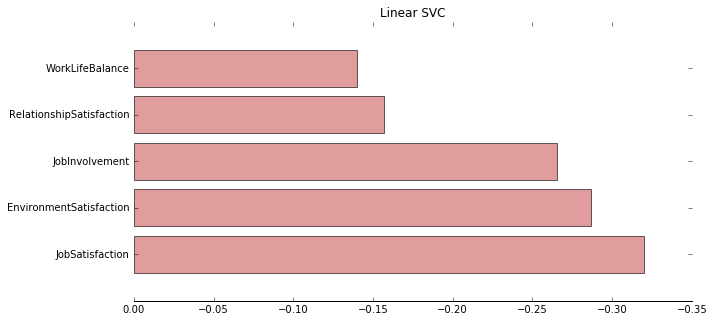

In [127]:
plt.figure(figsize = (10,5),frameon=False)

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    n = len(names)
    plt.barh(range(n), imp, align='center', alpha = 0.6, color = 'indianred')
    plt.yticks(range(len(names)), names)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)


f_importances(ordinal['coeff'].values, ordinal['feature'].values)
plt.xlim(0, -0.35)
plt.title("Linear SVC")
plt.show()


### Monetary 

In [122]:
monetary = svc_df[svc_df['feature'].isin(['DailyRate','HourlyRate',
'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'StockOptionLevel', "OverTime"])]
monetary

,coeff,feature
10,-0.153547,StockOptionLevel
18,-0.064579,PercentSalaryHike
23,-0.043126,DailyRate
29,0.002887,MonthlyIncome
30,0.005813,MonthlyRate
39,0.054435,HourlyRate
51,0.550226,OverTime


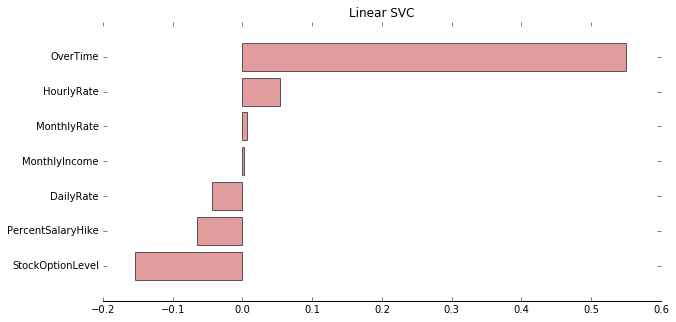

In [132]:
plt.figure(figsize = (10,5),frameon=False)
f_importances(monetary['coeff'].values, monetary['feature'].values)
plt.xlim(-0.2, 0.6)
plt.title("Linear SVC")
plt.show()

In [123]:
from sklearn.decomposition import PCA

pos_x = train_set[['DailyRate','HourlyRate',
'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'StockOptionLevel',"OverTime"]]
pos_y  = train_set['Attrition']

scalerTrain = StandardScaler()
scalerTrain.fit(pos_x)
econ_train = scalerTrain.transform(pos_x) #normalize

pca = PCA(n_components=3)
pca_result = pca.fit_transform(pos_x)

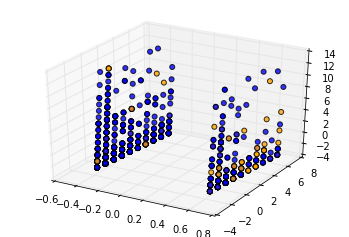

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=None, azim=None)

colors = ['green','darkorange']
cl = [];
for i in range(0,len(y_train)):
    if y_train[i] == 0:
        c = 'blue'
    else:
        c = 'orange'
    cl.append(c)

x = pca_result[:, 0].tolist();
y = pca_result[:, 1].tolist();
z = pca_result[:, 2].tolist();

ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1, 1, 1]))
ax.scatter(z,y,x, s = 25, c=cl, depthshade=True, alpha = 0.8)

In [14]:
pos_x = train_set[['TotalWorkingYears', 'JobSatisfaction', 'EnvironmentSatisfaction']]
pos_y  = train_set['Attrition']


pca = PCA(n_components=3)
pca_result = pca.fit_transform(pos_x)

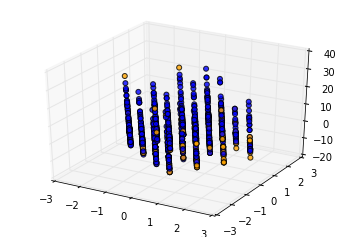

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=None, azim=None)

cl = [];
for i in range(0,len(y_train)):
    if y_train[i] == 0:
        c = 'blue'
    else:
        c = 'orange'
    cl.append(c)

x = pca_result[:, 0].tolist();
y = pca_result[:, 1].tolist();
z = pca_result[:, 2].tolist();

ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1, 1, 1]))
ax.scatter(z,y,x, s = 25, c=cl, depthshade=True, alpha = 0.8)

In [16]:
pos_x = train_set[['TotalWorkingYears', 'JobSatisfaction', 'OverTime', 'YearsSinceLastPromotion']]
pos_y  = train_set['Attrition']

scalerTrain = StandardScaler()
scalerTrain.fit(pos_x)
econ_train = scalerTrain.transform(pos_x) #normalize

pca = PCA(n_components=3)
pca_result = pca.fit_transform(pos_x)

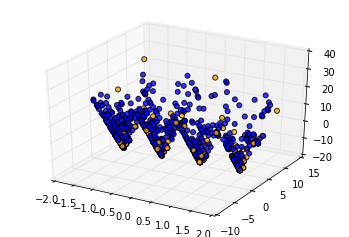

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=None, azim=None)

colors = ['green','darkorange']
cl = [];
for i in range(0,len(y_train)):
    if y_train[i] == 0:
        c = 'blue'
    else:
        c = 'orange'
    cl.append(c)

x = pca_result[:, 0].tolist();
y = pca_result[:, 1].tolist();
z = pca_result[:, 2].tolist();

ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1, 1, 1]))
ax.scatter(z,y,x, s = 25, c=cl, depthshade=True, alpha = 0.8)